# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
from scipy import stats
# dir(stats)

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(100)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.0101525445522108
1.0204081632653061


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [5]:
lambda_heights = [72, 72, 77, 72, 73, 67, 64, 58, 63, 78]

In [6]:
import pandas as pd
df = pd.DataFrame({'heights': lambda_heights})
df

,heights
0,72
1,72
2,77
3,72
4,73
5,67
6,64
7,58
8,63
9,78


In [7]:
df.heights.mean()

69.6

In [8]:
import random
random.seed(10)

population = []

for _ in range(1000):
  population.append(random.randint(0, 1))
  
print(population)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [9]:
sample = random.sample(population, 100)
print(sample)

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]


In [10]:
import numpy as np

def mean(list):
  average = np.sum(list)/len(list)
  return average

print('Population Mean:', mean(population))
print('Sample Mean:', mean(sample))

Population Mean: 0.507
Sample Mean: 0.46


In [11]:
df = pd.DataFrame({'likes_coke': sample})
df.head()



,likes_coke
0,0
1,0
2,0
3,0
4,1


In [12]:
df.likes_coke.mean()

0.46

In [13]:
df.plot.hist()

In [14]:
import scipy

In [15]:
scipy.stats.ttest_1samp(df['likes_coke'], mean(population))

Ttest_1sampResult(statistic=-0.9382955561680112, pvalue=0.3503760732929039)

In [16]:
df.likes_coke.describe()

count    100.000000
mean       0.460000
std        0.500908
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: likes_coke, dtype: float64

In [17]:
mean(df.likes_coke)

0.46

In [19]:
def variance(list):
  n = len(list)
  return np.sum((list - mean(list))**2)/(n-1)
  
print(variance(df.likes_coke))
print(df.likes_coke.var())

0.25090909090909086
0.250909090909091


In [20]:
def stddev(list):
  var = variance(list)
  return var**0.5

stddev(df.likes_coke)

0.5009082659620331

In [21]:
t_stat = mean(df.likes_coke) - mean(population)/ stddev(df.likes_coke)/ len(df.likes_coke)**0.5

In [22]:
t_stat

0.3587838623452805

In [23]:
n = len(df.likes_coke)
t_stat = (mean(df.likes_coke) - .5)/(stddev(df.likes_coke)/n**0.5)

In [24]:
t_stat

-0.7985494095046901

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [63]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
columns = ['class_name', 'handicapped_infants', 'water_project_cost_sharing', 'adoption_of_the_budget_resolution',
          'physician_fee_freeze', 'el_salvador_aid', 'religious_groups_in_schools', 'anti_satellite_test_ban',
          'aid_to_nicaraguan_contras', 'mx_missile', 'immigration', 'synfuels_corporation_cutback',
          'education_spending', 'superfund_right_to_sue', 'crime', 'duty_free_exports',
          'export_administration_act_south_africa']
df = pd.read_csv(url, header=None, na_values='?', names=columns)
df.head()

,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [64]:
df.head(1).T

,0
class_name,republican
handicapped_infants,n
water_project_cost_sharing,y
adoption_of_the_budget_resolution,n
physician_fee_freeze,y
el_salvador_aid,y
religious_groups_in_schools,y
anti_satellite_test_ban,n
aid_to_nicaraguan_contras,n
mx_missile,n


In [65]:
df.shape

(435, 17)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
class_name                                435 non-null object
handicapped_infants                       423 non-null object
water_project_cost_sharing                387 non-null object
adoption_of_the_budget_resolution         424 non-null object
physician_fee_freeze                      424 non-null object
el_salvador_aid                           420 non-null object
religious_groups_in_schools               424 non-null object
anti_satellite_test_ban                   421 non-null object
aid_to_nicaraguan_contras                 420 non-null object
mx_missile                                413 non-null object
immigration                               428 non-null object
synfuels_corporation_cutback              414 non-null object
education_spending                        404 non-null object
superfund_right_to_sue                    410 non-null object
crime                      

In [68]:
df.isnull().sum()

class_name                                  0
handicapped_infants                        12
water_project_cost_sharing                 48
adoption_of_the_budget_resolution          11
physician_fee_freeze                       11
el_salvador_aid                            15
religious_groups_in_schools                11
anti_satellite_test_ban                    14
aid_to_nicaraguan_contras                  15
mx_missile                                 22
immigration                                 7
synfuels_corporation_cutback               21
education_spending                         31
superfund_right_to_sue                     25
crime                                      17
duty_free_exports                          28
export_administration_act_south_africa    104
dtype: int64

In [69]:
df_drop = df.dropna()
df_drop.isnull().sum()

class_name                                0
handicapped_infants                       0
water_project_cost_sharing                0
adoption_of_the_budget_resolution         0
physician_fee_freeze                      0
el_salvador_aid                           0
religious_groups_in_schools               0
anti_satellite_test_ban                   0
aid_to_nicaraguan_contras                 0
mx_missile                                0
immigration                               0
synfuels_corporation_cutback              0
education_spending                        0
superfund_right_to_sue                    0
crime                                     0
duty_free_exports                         0
export_administration_act_south_africa    0
dtype: int64

In [71]:
df_drop = df_drop.replace(['y', 'n'], [1, 0])
df_drop.head()

,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


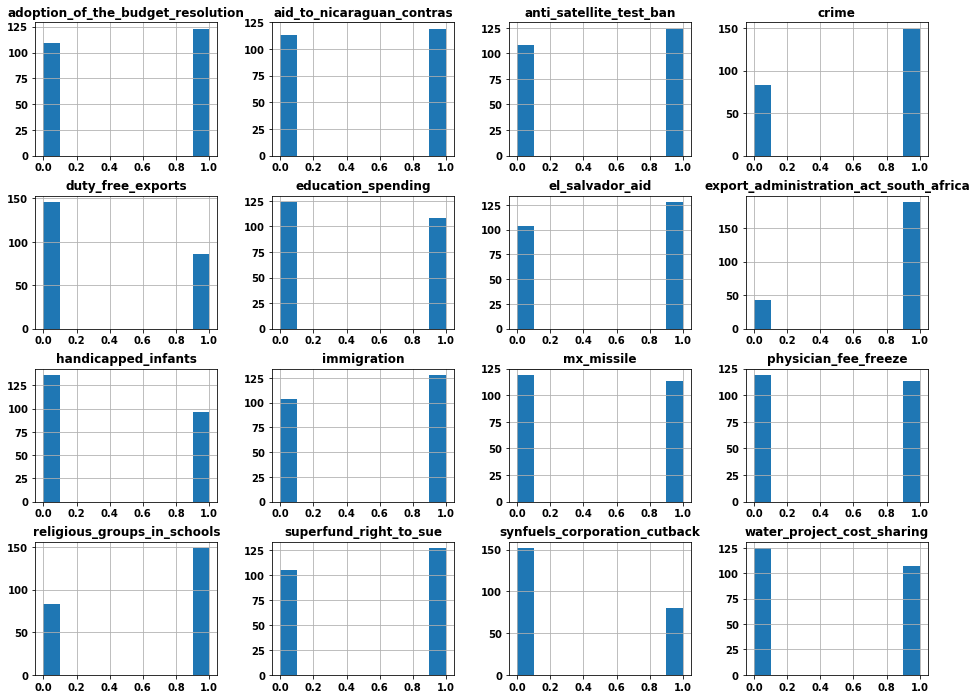

In [76]:
df_drop.hist(figsize=(16, 12));

In [85]:
religious_groups_df = df_drop[['class_name', 'religious_groups_in_schools']]
religious_groups_df.head()

,class_name,religious_groups_in_schools
5,democrat,1
8,republican,1
19,democrat,0
23,democrat,0
25,democrat,0


In [103]:
rep_df = religious_groups_df[religious_groups_df['class_name'] == 'republican']
rep_df = rep_df.drop('class_name', axis=1)
type(rep_df)

pandas.core.frame.DataFrame

In [99]:
rep_df.shape

(108, 1)

In [97]:
dem_df = religious_groups_df[religious_groups_df['class_name'] == 'democrat']
dem_df = dem_df.drop('class_name', axis=1)
dem_df.head(5)

,religious_groups_in_schools
5,1
19,0
23,0
25,0
26,0


In [100]:
dem_df.shape

(124, 1)

In [104]:
rep_pop_list = rep_df['religious_groups_in_schools'].tolist()

dem_pop_list = dem_df['religious_groups_in_schools'].tolist()

print(rep_pop_list)
print(dem_pop_list)

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0]


In [105]:
rep_sample = random.sample(rep_pop_list, 30)
dem_sample = random.sample(dem_pop_list, 30)

print(rep_sample)
print(dem_sample)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]


### Null Hypothesis: 

There is not a significant difference between how republicans and democrats voted on the issue of religious groups in schools.

In [107]:
def mean(list):
    average = np.sum(list)/len(list)
    return average

print('Republican Pop Mean:', mean(rep_pop_list))
print('Republican Sample Mean:', mean(rep_sample))
print('Democrat Pop Mean:', mean(dem_pop_list))
print('Democrat Sample Mean:', mean(dem_sample))

Republican Pop Mean: 0.8703703703703703
Republican Sample Mean: 0.8666666666666667
Democrat Pop Mean: 0.4435483870967742
Democrat Sample Mean: 0.43333333333333335


In [108]:
def variance(list):
    n = len(list)
    return np.sum((list - mean(list))**2)/(n-1)

print('Republican Pop Variance:', variance(rep_pop_list))
print('Republican Sample Variance:', variance(rep_sample))
print('Democrat Pop Variance:', variance(dem_pop_list))
print('Democrat Sample Variance:', variance(dem_sample))

Republican Pop Variance: 0.11388023537556247
Republican Sample Variance: 0.11954022988505751
Democrat Pop Variance: 0.24881982690794657
Democrat Sample Variance: 0.25402298850574706


In [109]:
def stddev(list):
    var = variance(list)
    return var**0.5

print('Republican Pop Standard Dev:', stddev(rep_pop_list))
print('Republican Sample Standard Dev:', stddev(rep_sample))
print('Democrat Pop Standard Dev:', stddev(dem_pop_list))
print('Democrat Sample Standard Dev:', stddev(dem_sample))

Republican Pop Standard Dev: 0.33746145761488444
Republican Sample Standard Dev: 0.34574590364176044
Democrat Pop Standard Dev: 0.4988184308021773
Democrat Sample Standard Dev: 0.5040069329937308


In [111]:
def ttest(sample, population):
    n = len(sample)
    t_stat = (mean(sample) - mean(population)) / (stddev(sample)/(n**0.5))
    return t_stat

print('Republican Sample T-test:', ttest(rep_sample, rep_df))
print('Democrat Sample T-test:', ttest(dem_sample, dem_df))

Republican Sample T-test: religious_groups_in_schools   -0.058673
dtype: float64
Democrat Sample T-test: religious_groups_in_schools   -0.111011
dtype: float64


In [112]:
scipy.stats.ttest_ind(rep_sample, dem_sample)

Ttest_indResult(statistic=3.88329756778952, pvalue=0.00026659075912431336)

### Findings:

Based on the P-Value: 0.0002, we must reject the null hypothesis and conclude that there was a significant difference between how republicans and democrats voted on the issue of religious groups in schools. The republicans voted in favor of religious groups in schools significantly more than democrats.

In [115]:
df_drop.columns

Index(['class_name', 'handicapped_infants', 'water_project_cost_sharing',
       'adoption_of_the_budget_resolution', 'physician_fee_freeze',
       'el_salvador_aid', 'religious_groups_in_schools',
       'anti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missile',
       'immigration', 'synfuels_corporation_cutback', 'education_spending',
       'superfund_right_to_sue', 'crime', 'duty_free_exports',
       'export_administration_act_south_africa'],
      dtype='object')

In [130]:
aid_to_nicaraguan_contras_df = df_drop[['class_name', 'aid_to_nicaraguan_contras']]
aid_to_nicaraguan_contras_df.head()

,class_name,aid_to_nicaraguan_contras
5,democrat,0
8,republican,0
19,democrat,1
23,democrat,1
25,democrat,1


In [131]:
aid_to_nicaraguan_contras_df.groupby('class_name')['aid_to_nicaraguan_contras'].value_counts()

class_name  aid_to_nicaraguan_contras
democrat    1                            103
            0                             21
republican  0                             92
            1                             16
Name: aid_to_nicaraguan_contras, dtype: int64

In [135]:
rep_df = aid_to_nicaraguan_contras_df[aid_to_nicaraguan_contras_df['class_name'] == 'republican']
rep_df = rep_df.drop('class_name', axis=1)
rep_pop_list = rep_df['aid_to_nicaraguan_contras'].tolist()

dem_df = aid_to_nicaraguan_contras_df[aid_to_nicaraguan_contras_df['class_name'] == 'democrat']
dem_df = dem_df.drop('class_name', axis=1)
dem_pop_list = dem_df['aid_to_nicaraguan_contras'].tolist()

print(rep_pop_list)
print(dem_pop_list)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [136]:
rep_sample = random.sample(rep_pop_list, 30)
dem_sample = random.sample(dem_pop_list, 30)

print(rep_sample)
print(dem_sample)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]


### Null Hypothesis:

There is no significant difference between how republicans and democrats voted on the issue of aid to Nicaraguan contras.

In [137]:
scipy.stats.ttest_ind(rep_sample, dem_sample)

Ttest_indResult(statistic=-6.923430096239918, pvalue=3.940773185699437e-09)

### Findings:

Based on the P-Value: 3.940773185699437e-09 we must reject the null hypothesis and conclude that there was a significant difference between how republicans and democrats voted on the issue of aid to Nicaraguan contras. The democrats voted in favor of sending aid to Nicaraguan contras significantly more than the republicans.

In [138]:
immigration_df = df_drop[['class_name', 'immigration']]
immigration_df.head()

,class_name,immigration
5,democrat,0
8,republican,0
19,democrat,0
23,democrat,0
25,democrat,1


In [139]:
immigration_df.groupby('class_name')['immigration'].value_counts()

class_name  immigration
democrat    1              66
            0              58
republican  1              62
            0              46
Name: immigration, dtype: int64

In [143]:
rep_df = immigration_df[immigration_df['class_name'] == 'republican']
rep_df = rep_df.drop('class_name', axis=1)
rep_pop_list = rep_df['immigration'].tolist()

dem_df = immigration_df[immigration_df['class_name'] == 'democrat']
dem_df = dem_df.drop('class_name', axis=1)
dem_pop_list = dem_df['immigration'].tolist()

print(rep_pop_list)
print(dem_pop_list)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1]


### Null Hypothesis:

There is no significant difference between how republicans and democrats voted on the issue of immigration.

In [144]:
rep_sample = random.sample(rep_pop_list, 30)
dem_sample = random.sample(rep_pop_list, 30)

print(rep_sample)
print(dem_sample)

[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0]


In [145]:
scipy.stats.ttest_ind(rep_sample, dem_sample)

Ttest_indResult(statistic=0.5134553180524704, pvalue=0.6095833252958358)

### Findings:

Based on the P-Value: 0.6095 we cannot reject the null hypothesis.

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars